# **Import Library**

In [1]:
# Import library
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Data**

In [2]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


# **Checking Outliers**

## **Visualisasi Outliers**

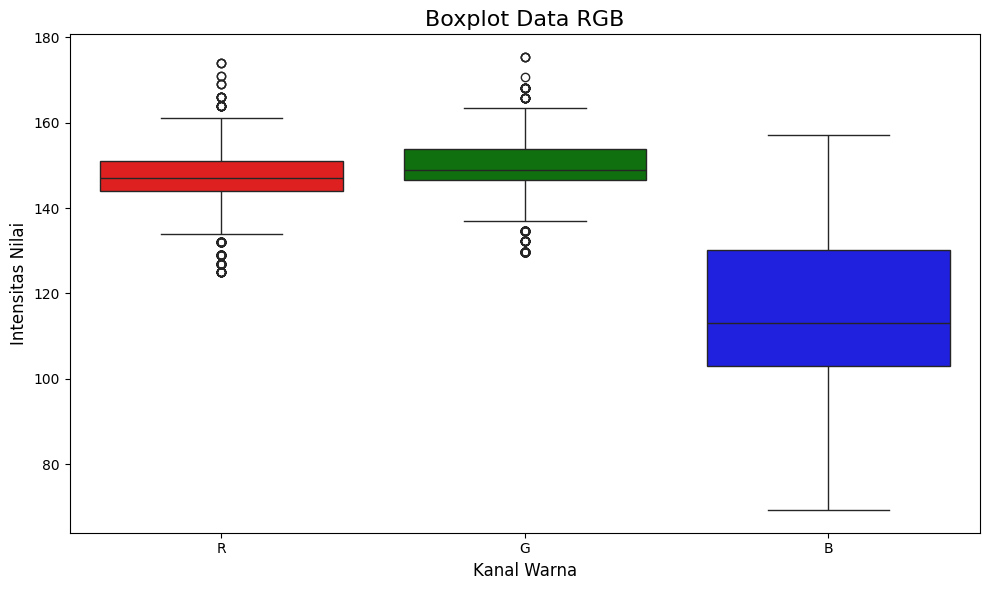

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()


## **Mengatasi Outliers**

In [5]:

# Fungsi seteksi outlier dengan IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Deteksi outlier pada data RGB
outliers_R = detect_outliers_iqr(df['R'])
outliers_G = detect_outliers_iqr(df['G'])
outliers_B = detect_outliers_iqr(df['B'])

print("Outliers in R:", outliers_R)
print("Outliers in G:", outliers_G)
print("Outliers in B:", outliers_B)

Outliers in R: 33      164
55      164
73      164
254     132
255     129
       ... 
1215    164
1222    171
1229    174
1257    164
1263    164
Name: R, Length: 158, dtype: int64
Outliers in G: 27      165.8
254     132.2
255     129.8
256     132.2
257     132.2
        ...  
1199    165.8
1220    175.4
1241    175.4
1372    165.8
1416    165.8
Name: G, Length: 144, dtype: float64
Outliers in B: Series([], Name: B, dtype: float64)


In [6]:
# Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
df_cleaned = df.copy()

# Menghapus outlier dari salinan DataFrame
df_cleaned = df_cleaned[~df_cleaned['R'].isin(outliers_R)]
df_cleaned = df_cleaned[~df_cleaned['G'].isin(outliers_G)]
df_cleaned = df_cleaned[~df_cleaned['B'].isin(outliers_B)]

# Menampilkan jumlah data sebelum dan sesudah pembersihan
print("Jumlah data sebelum pembersihan:", len(df))
print("Jumlah data setelah pembersihan:", len(df_cleaned))

Jumlah data sebelum pembersihan: 1441
Jumlah data setelah pembersihan: 1242


# **Preprocessing**

## **Normalisasi**

In [7]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [8]:
df_norm=normalize_rgb(df)
df_norm

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


## **Perbandingan Kanal**

In [9]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df_norm.copy()

    # Hitung rasio R/G
    df_rasio['R_G_ratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G_B_ratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [10]:
df_rasio = calculate_ratios(df_norm)
df_rasio

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


## **Mencari Nilai HSV**

In [11]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df_rasio.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [12]:
df_hsv=rgb_to_hsv(df_rasio)
df_hsv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


## **Mencari Nilai Lab**

### **Hitung Manual**

In [13]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df_hsv.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [14]:
df_lab=rgb_to_lab(df_hsv)
df_lab

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


In [15]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
 6   r                 1441 non-null   float64
 7   g                 1441 non-null   float64
 8   b                 1441 non-null   float64
 9   R_G_ratio         1441 non-null   float64
 10  G_B_ratio         1441 non-null   float64
 11  H                 1441 non-null   float64
 12  S                 1441 non-null   float64
 13  V                 1441 non-null   float64
 14  cL                1441 non-null   float64
 15  ca                1441 non-null   float64
 16  cb                1441 non-null   float64


### **Hitung Dengan Library OpenCV**

In [16]:
def rgb_to_lab_with_opencv(df):

    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_cv = df_hsv.copy()

    # Konversi RGB ke LAB menggunakan OpenCV
    rgb_values = df_cv[['R', 'G', 'B']].values.astype(np.uint8)
    rgb_values = rgb_values[:, ::-1]
    lab_values = cv2.cvtColor(rgb_values.reshape(1, -1, 3), cv2.COLOR_BGR2LAB).reshape(-1, 3)

    # Pisahkan nilai L, a, dan b
    L = lab_values[:, 0] * (100 / 255)  # Konversi L ke rentang [0, 100]
    
    # Ubah tipe data a dan b ke float sebelum penggeseran
    a = lab_values[:, 1].astype(float) - 128  # Geser a ke rentang [-128, 127]
    b = lab_values[:, 2].astype(float) - 128  # Geser b ke rentang [-128, 127]

    # Tambahkan kolom cL, ca, dan cb ke DataFrame
    df_cv['cL'] = L
    df_cv['ca'] = a
    df_cv['cb'] = b

    return df_cv

In [17]:
df_cv=rgb_to_lab_with_opencv(df_hsv)
df_cv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


# **Klasifikasi**

## **Import Library**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## **Mempersiapkan Data**

In [19]:
def prepare_data(df):

    # Memilih kolom yang akan digunakan sebagai fitur
    # Mengabaikan kolom 'Pengambilan' dan 'IR_Intensity (%)'
    feature_columns = [col for col in df.columns if col not in ['Pengambilan', 'IR_Intensity (%)', 'Perlakuan']]
    
    # Memilih fitur dan target
    X = df[feature_columns]
    y = df['Perlakuan']
    
    # Membagi data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Preprocessing untuk ANN: MinMaxScaler
    scaler_ann = MinMaxScaler()
    X_train_ann = scaler_ann.fit_transform(X_train)
    X_test_ann = scaler_ann.transform(X_test)
    
    # Preprocessing untuk AdaBoost SVM: StandardScaler
    scaler_svm = StandardScaler()
    X_train_svm = scaler_svm.fit_transform(X_train)
    X_test_svm = scaler_svm.transform(X_test)
    
    # Preprocessing untuk AdaBoost DT: Tanpa scaling
    X_train_dt = X_train.values
    X_test_dt = X_test.values
    
    print(f"Jumlah fitur yang digunakan: {len(feature_columns)}")
    print(f"Fitur yang digunakan: {feature_columns}")
    print(f"Jumlah data training: {X_train.shape[0]}")
    print(f"Jumlah data testing: {X_test.shape[0]}")
    
    return {
        'X_train_ann': X_train_ann, 'X_test_ann': X_test_ann,
        'X_train_svm': X_train_svm, 'X_test_svm': X_test_svm,
        'X_train_dt': X_train_dt, 'X_test_dt': X_test_dt,
        'y_train': y_train, 'y_test': y_test,
        'feature_columns': feature_columns
    }

In [20]:
data_prep = prepare_data(df_lab)

Jumlah fitur yang digunakan: 14
Fitur yang digunakan: ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433


## **Membuat Model ANN**

In [21]:
def train_ann(X_train, y_train, X_test, y_test):

    print("=== Melatih Model ANN ===")
    
    # Membuat model ANN
    ann = MLPClassifier(
        hidden_layer_sizes=(100, 50),  # Dua hidden layer dengan 100 dan 50 neuron
        activation='relu',             # Fungsi aktivasi ReLU
        solver='adam',                 # Optimizer Adam
        max_iter=1000,                 # Jumlah iterasi maksimum
        random_state=42,               # Untuk reproduktifitas hasil
        early_stopping=True,           # Menggunakan early stopping
        validation_fraction=0.1        # Bagian data untuk validasi
    )
    
    # Melatih model
    ann.fit(X_train, y_train)
    
    # Prediksi
    y_pred = ann.predict(X_test)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi ANN: {acc:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    return ann, y_pred, acc

In [22]:
ann_model, y_pred_ann, acc_ann = train_ann(
    data_prep['X_train_ann'], data_prep['y_train'], 
    data_prep['X_test_ann'], data_prep['y_test']
)

=== Melatih Model ANN ===
Akurasi ANN: 0.4296

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        96
           1       0.41      0.35      0.38       114
           2       0.31      0.59      0.41       106
           3       0.50      0.22      0.31       117

    accuracy                           0.43       433
   macro avg       0.48      0.44      0.43       433
weighted avg       0.47      0.43      0.43       433



## **Membuat Model Adaboost DT**

In [23]:
def train_adaboost_dt(X_train, y_train, X_test, y_test):
    
    print("=== Melatih Model AdaBoost dengan Decision Tree ===")
    
    # Membuat base learner (Decision Tree)
    dt = DecisionTreeClassifier(max_depth=3, random_state=42)
    
    # Membuat model AdaBoost
    adaboost_dt = AdaBoostClassifier(
        estimator=dt,
        n_estimators=50,      # Jumlah estimator
        learning_rate=1.0,    # Learning rate
        random_state=42
    )
    
    # Melatih model
    adaboost_dt.fit(X_train, y_train)
    
    # Prediksi
    y_pred = adaboost_dt.predict(X_test)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi AdaBoost dengan Decision Tree: {acc:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    return adaboost_dt, y_pred, acc


In [24]:
adaboost_dt_model, y_pred_adaboost_dt, acc_adaboost_dt = train_adaboost_dt(
    data_prep['X_train_dt'], data_prep['y_train'], 
    data_prep['X_test_dt'], data_prep['y_test']
)

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost dengan Decision Tree: 0.5797

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        96
           1       0.47      0.55      0.51       114
           2       0.62      0.58      0.60       106
           3       0.64      0.54      0.59       117

    accuracy                           0.58       433
   macro avg       0.59      0.58      0.58       433
weighted avg       0.59      0.58      0.58       433



c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## **Membuat Model Adaboost SVM RBF**

In [25]:
def train_adaboost_svm(X_train, y_train, X_test, y_test):

    print("=== Melatih Model AdaBoost dengan SVM RBF Kernel ===")
    
    # Membuat base learner (SVM dengan kernel RBF)
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    
    # Membuat model AdaBoost
    adaboost_svm = AdaBoostClassifier(
        estimator=svm,
        n_estimators=50,      # Jumlah estimator
        learning_rate=1.0,    # Learning rate
        random_state=42
    )
    
    # Melatih model
    adaboost_svm.fit(X_train, y_train)
    
    # Prediksi
    y_pred = adaboost_svm.predict(X_test)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi AdaBoost dengan SVM RBF Kernel: {acc:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    return adaboost_svm, y_pred, acc

In [26]:
adaboost_svm_model, y_pred_adaboost_svm, acc_adaboost_svm = train_adaboost_svm(
    data_prep['X_train_svm'], data_prep['y_train'], 
    data_prep['X_test_svm'], data_prep['y_test']
)

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost dengan SVM RBF Kernel: 0.2356

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.38      0.32       114
           2       0.21      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433



c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Membuat Model Bagging SVM RBF**

In [27]:
def train_bagging_svm(X_train, y_train, X_test, y_test):
    print("=== Melatih Model Bagging dengan SVM RBF Kernel ===")
    
    # Membuat base learner (SVM dengan kernel RBF)
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    
    # Membuat model Bagging
    bagging_svm = BaggingClassifier(
        estimator=svm,
        n_estimators=50,      # Jumlah estimator
        random_state=42,
        n_jobs=-1             # Paralelisasi
    )
    
    # Melatih model
    bagging_svm.fit(X_train, y_train)
    
    # Prediksi
    y_pred = bagging_svm.predict(X_test)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi Bagging dengan SVM RBF Kernel: {acc:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    return bagging_svm, y_pred, acc

In [28]:
bagging_svm_model, y_pred_bagging_svm, acc_bagging_svm = train_bagging_svm(
    data_prep['X_train_svm'], data_prep['y_train'], 
    data_prep['X_test_svm'], data_prep['y_test']
)

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Akurasi Bagging dengan SVM RBF Kernel: 0.5543

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        96
           1       0.36      0.36      0.36       114
           2       0.41      0.55      0.47       106
           3       0.90      0.66      0.76       117

    accuracy                           0.55       433
   macro avg       0.59      0.56      0.57       433
weighted avg       0.59      0.55      0.57       433



In [31]:
y_pred_bagging_svm

array([1, 2, 2, 2, 2, 2, 2, 1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 1, 2, 2,
       3, 1, 2, 2, 1, 2, 1, 0, 3, 2, 3, 2, 2, 2, 2, 0, 3, 1, 0, 2, 1, 0,
       1, 3, 1, 0, 2, 0, 1, 2, 1, 1, 2, 3, 1, 3, 1, 0, 0, 3, 1, 0, 3, 0,
       2, 2, 1, 3, 0, 1, 2, 3, 0, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 0, 1,
       2, 1, 0, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 0, 3, 2, 2, 1, 3, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 3, 0, 0, 1, 2, 3,
       2, 3, 0, 1, 3, 0, 1, 3, 3, 2, 2, 0, 2, 2, 2, 3, 1, 1, 2, 3, 1, 3,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 3, 2, 2, 1, 0, 0, 2, 1, 2, 2, 3, 3, 1, 0, 1, 3, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 0, 3, 0, 1,
       3, 2, 2, 2, 2, 0, 2, 1, 2, 3, 3, 1, 2, 0, 1, 0, 3, 2, 3, 0, 2, 3,
       0, 3, 3, 0, 3, 0, 3, 0, 2, 1, 3, 0, 3, 3, 3, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 3, 1, 2, 3, 1, 2, 2, 1, 0, 1, 0, 2,
       0, 3, 3, 2, 0, 0, 2, 3, 1, 2, 1, 3, 2, 1, 0,

# **Visulasisai Hasil**

In [48]:
def visualize_results(y_test, y_pred_ann, y_pred_adaboost_dt, y_pred_adaboost_svm, y_pred_bagging_svm, 
                     acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm):

    # Confusion Matrix
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten untuk memudahkan akses
    
    # Confusion Matrix untuk ANN
    cm_ann = confusion_matrix(y_test, y_pred_ann)
    sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix - ANN\n(MinMaxScaler)')
    axes[0].set_xlabel('Prediksi')
    axes[0].set_ylabel('Aktual')
    
    # Confusion Matrix untuk AdaBoost-DT
    cm_adaboost_dt = confusion_matrix(y_test, y_pred_adaboost_dt)
    sns.heatmap(cm_adaboost_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title('Confusion Matrix - AdaBoost dengan DT\n(Tanpa Scaler)')
    axes[1].set_xlabel('Prediksi')
    axes[1].set_ylabel('Aktual')
    
    # Confusion Matrix untuk AdaBoost-SVM
    cm_adaboost_svm = confusion_matrix(y_test, y_pred_adaboost_svm)
    sns.heatmap(cm_adaboost_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title('Confusion Matrix - AdaBoost dengan SVM\n(StandardScaler)')
    axes[2].set_xlabel('Prediksi')
    axes[2].set_ylabel('Aktual')
    
    # Confusion Matrix untuk Bagging-SVM
    cm_bagging_svm = confusion_matrix(y_test, y_pred_bagging_svm)
    sns.heatmap(cm_bagging_svm, annot=True, fmt='d', cmap='Blues', ax=axes[3])
    axes[3].set_title('Confusion Matrix - Bagging dengan SVM\n(StandardScaler)')
    axes[3].set_xlabel('Prediksi')
    axes[3].set_ylabel('Aktual')
    
    plt.tight_layout()
    plt.show()
    
    # Perbandingan Akurasi
    print("\n=== Perbandingan Akurasi ===")
    print(f"Akurasi ANN (MinMaxScaler): {acc_ann:.4f}")
    print(f"Akurasi AdaBoost dengan Decision Tree (Tanpa Scaler): {acc_adaboost_dt:.4f}")
    print(f"Akurasi AdaBoost dengan SVM RBF Kernel (StandardScaler): {acc_adaboost_svm:.4f}")
    print(f"Akurasi Bagging dengan SVM RBF Kernel (StandardScaler): {acc_bagging_svm:.4f}")
    
    # Menentukan model terbaik
    best_acc = max(acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm)
    if best_acc == acc_ann:
        best_model = "ANN (MinMaxScaler)"
    elif best_acc == acc_adaboost_dt:
        best_model = "AdaBoost dengan Decision Tree (Tanpa Scaler)"
    elif best_acc == acc_adaboost_svm:
        best_model = "AdaBoost dengan SVM RBF Kernel (StandardScaler)"
    elif best_acc == acc_bagging_svm:
        best_model = "Bagging dengan SVM RBF Kernel"
    else:
        best_model = "Tidak ada model yang lebih baik"
    
    print(f"\nModel terbaik berdasarkan akurasi: {best_model} dengan akurasi {best_acc:.4f}")
    
    # Data model dan akurasi
    model_names = ['ANN\n(MinMaxScaler)', 'AdaBoost DT\n(Tanpa Scaler)', 
                'AdaBoost SVM\n(StandardScaler)', 'Bagging SVM\n(StandardScaler)']
    accuracies = [acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm]

    # Mengurutkan berdasarkan akurasi tertinggi
    sorted_indices = np.argsort(accuracies)[::-1]  # Urutkan dari tertinggi ke terendah
    sorted_models = np.array(model_names)[sorted_indices]
    sorted_accuracies = np.array(accuracies)[sorted_indices]

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_models, sorted_accuracies, color=plt.cm.Greens(np.linspace(0.9, 0.5, len(model_names))))
    plt.ylim(0, 1.0)
    plt.ylabel('Akurasi')
    plt.title('Perbandingan Akurasi Model')

    # Tambahkan nilai akurasi di atas bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f'{bar.get_height():.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

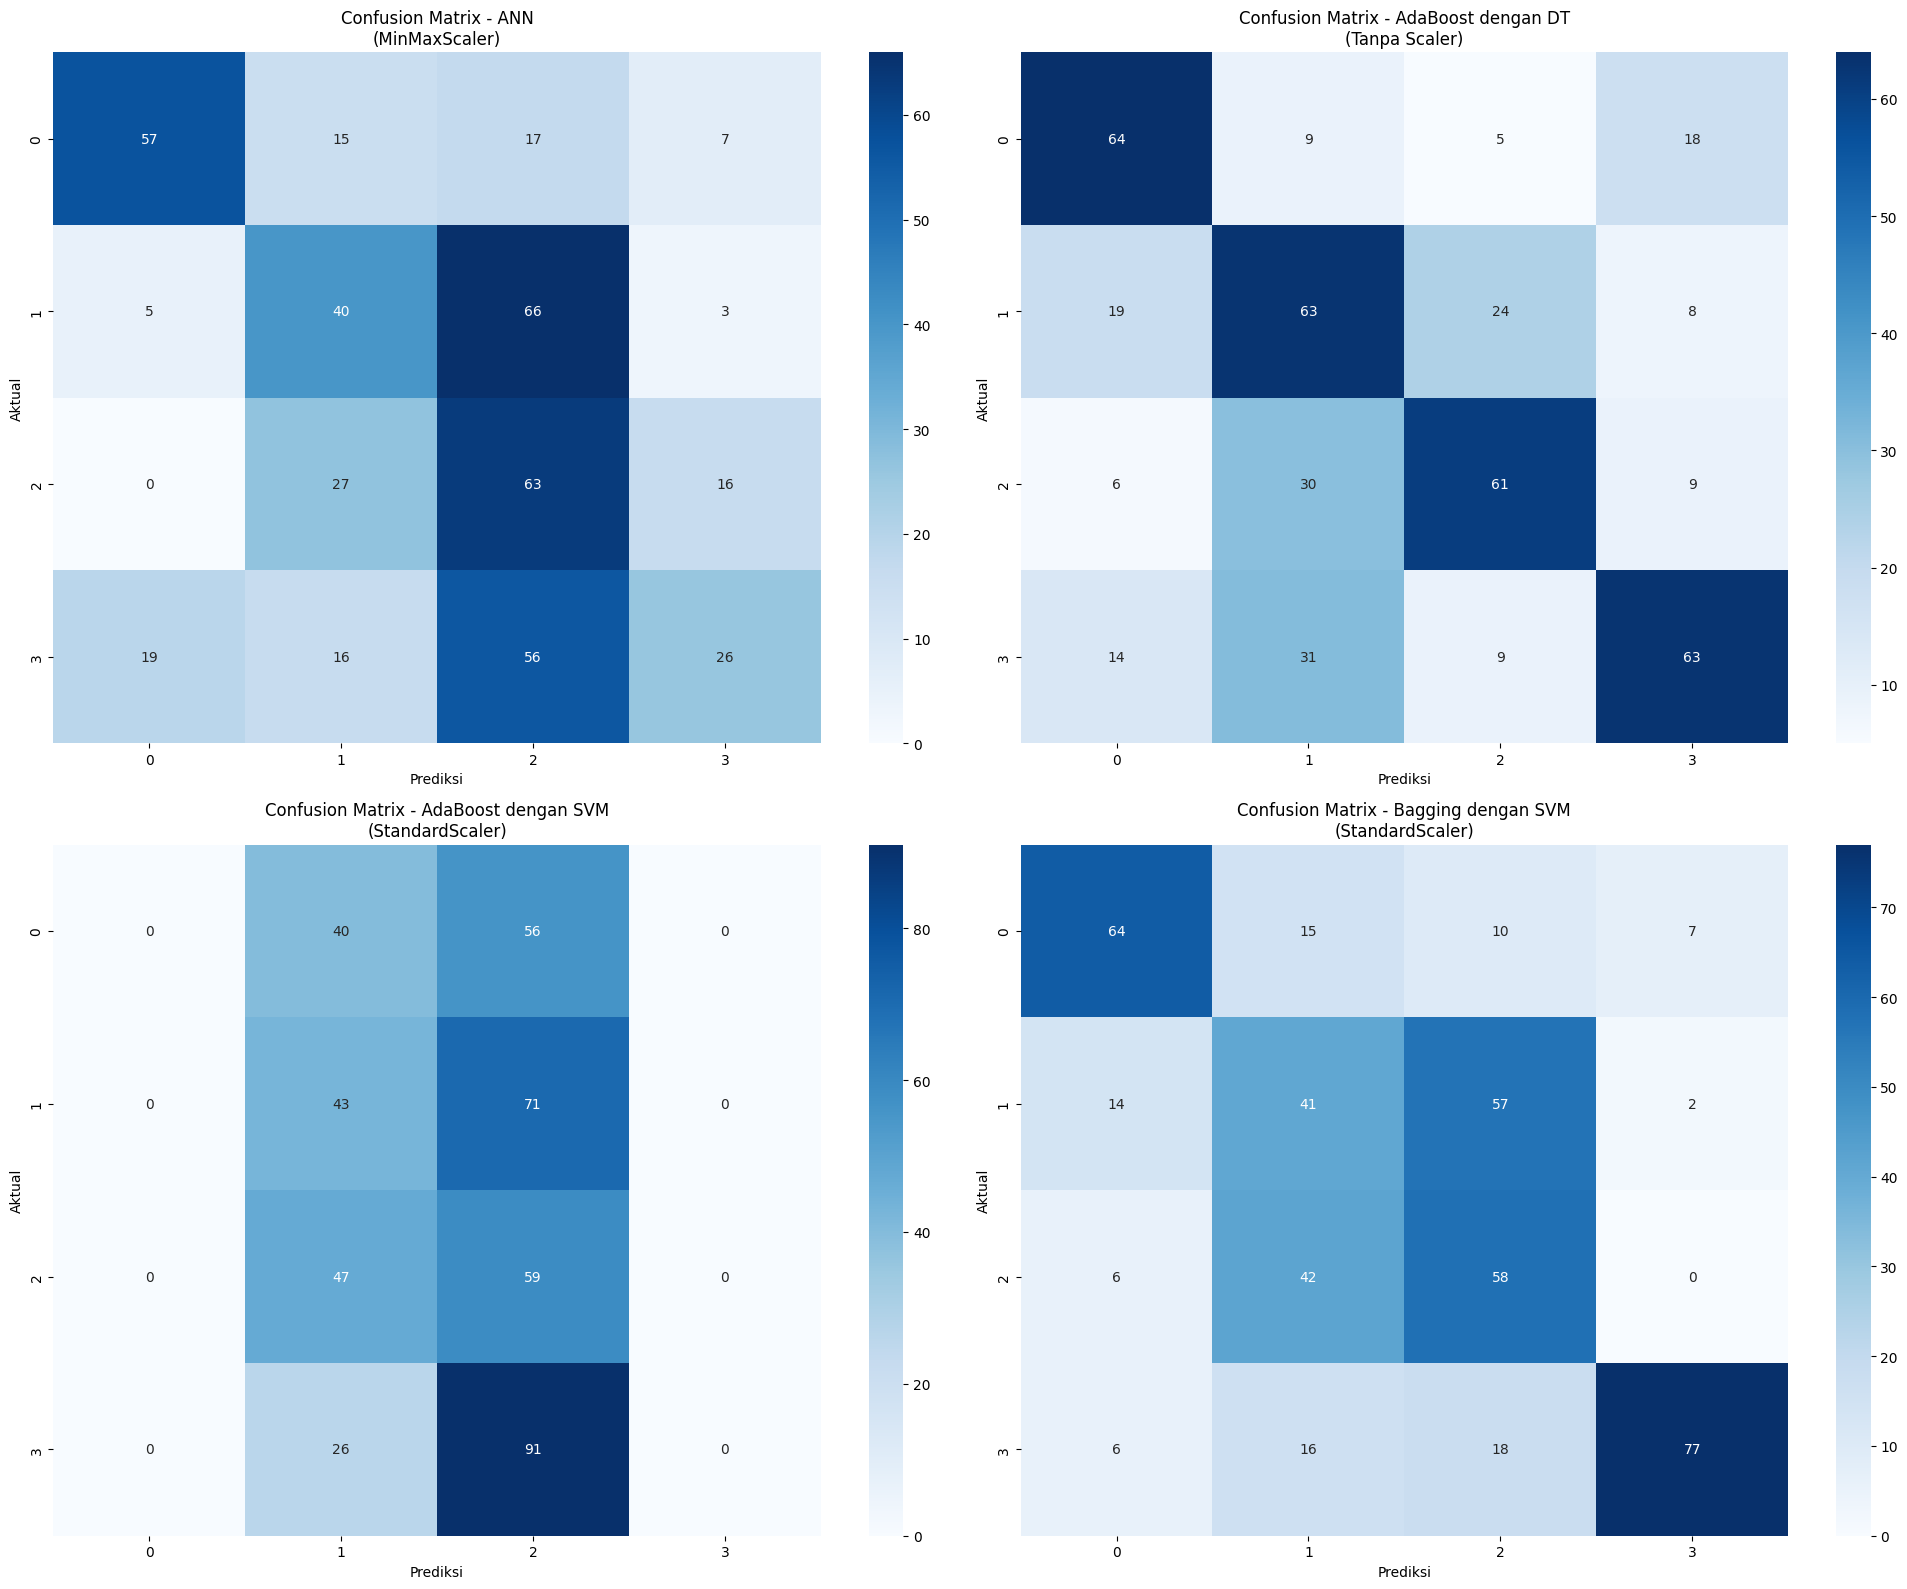


=== Perbandingan Akurasi ===
Akurasi ANN (MinMaxScaler): 0.4296
Akurasi AdaBoost dengan Decision Tree (Tanpa Scaler): 0.5797
Akurasi AdaBoost dengan SVM RBF Kernel (StandardScaler): 0.2356
Akurasi Bagging dengan SVM RBF Kernel (StandardScaler): 0.5543

Model terbaik berdasarkan akurasi: AdaBoost dengan Decision Tree (Tanpa Scaler) dengan akurasi 0.5797


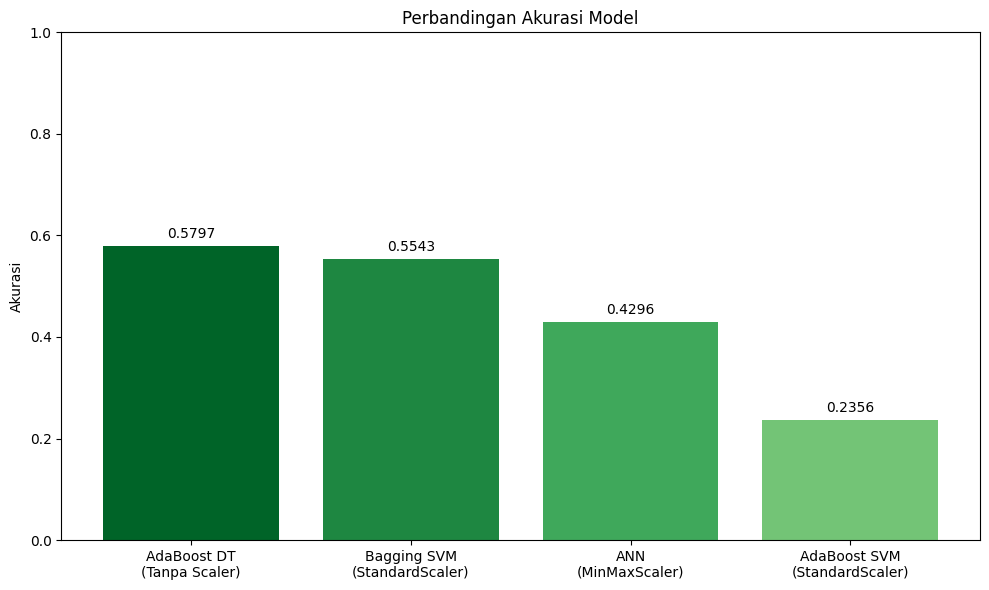

In [49]:
visualize_results(
    data_prep['y_test'], y_pred_ann, y_pred_adaboost_dt, y_pred_adaboost_svm, y_pred_bagging_svm,
    acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm
)